In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function, division
from builtins import range

%matplotlib inline

In [9]:
def build_state(features):
    return int(''.join(map(str, features)))

def to_bin(value, bins):
    return np.digitize(x=[value], bins=bins)[0]

In [10]:
class FeatureTransformer:
    def __init__(self):
        self.cart_position_bins = np.linspace(-2.4, 2.4, 9)
        self.cart_velocity_bins = np.linspace(-2, 2, 9) 
        self.pole_angle_bins = np.linspace(-0.4, 0.4, 9)
        self.pole_velocity_bins = np.linspace(-3.5, 3.5, 9) 



    def transform(self, observation):
        cart_pos, cart_vel, pole_angle, pole_vel = observation
        return build_state([
            to_bin(cart_pos, self.cart_position_bins),
            to_bin(cart_vel, self.cart_velocity_bins),
            to_bin(pole_angle, self.pole_angle_bins),
            to_bin(pole_vel, self.pole_velocity_bins),
        ])

In [11]:
class Model:
    def __init__(self, env, feature_transformer):
        self.env = env
        self.feature_transformer = feature_transformer
        num_states = 10**env.observation_space.shape[0]
        num_actions = env.action_space.n
        self.Q = np.random.uniform(low=-1, high=1, size=(num_states, num_actions))

    def predict(self, s):
        x = self.feature_transformer.transform(s)
        return self.Q[x]


    def update(self, s, a, G):
        x = self.feature_transformer.transform(s)
        self.Q[x,a] += 1e-2*(G - self.Q[x,a])


    def sample_action(self, s, eps):
        if np.random.random() < eps:
            return self.env.action_space.sample()
        else:
            p = self.predict(s)
        return np.argmax(p)

In [12]:
def play_episode(model, eps, gamma):
    observation = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = model.sample_action(observation, eps)
        prev_observation = observation
        observation, reward, done, info = env.step(action)
        total_reward += reward

        if done:
            reward = - 200
            
        G = reward + gamma*np.max(model.predict(observation))
        model.update(prev_observation, action, G)

    return total_reward

In [13]:
def plot_running_avg(total_rewards):
    n = len(total_rewards)
    running_avg = np.empty(n)

    for t in range(n):
        running_avg[t] = total_rewards[max(0, t-100):(t+1)].mean()

    plt.plot(running_avg)
    plt.title("Running Average")
    plt.show()

episode: 0 total reward: 17.0 eps: 1.0
episode: 1000 total reward: 185.0 eps: 0.0316069770621
episode: 2000 total reward: 165.0 eps: 0.0223550917005
episode: 3000 total reward: 96.0 eps: 0.0182543764409
episode: 4000 total reward: 146.0 eps: 0.0158094122478
episode: 5000 total reward: 104.0 eps: 0.0141407216223
episode: 6000 total reward: 168.0 eps: 0.0129088687931
episode: 7000 total reward: 200.0 eps: 0.0119514324501
episode: 8000 total reward: 182.0 eps: 0.0111796411818
episode: 9000 total reward: 133.0 eps: 0.0105403399757
avg reward for last 100 episodes: 157.34
total steps: 1361777.0


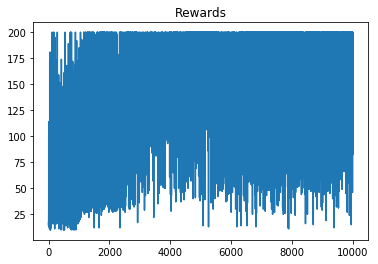

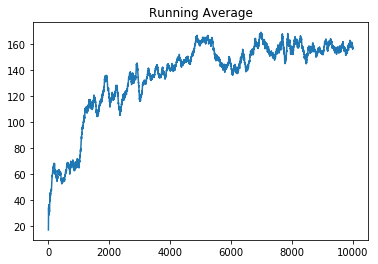

In [14]:
if __name__ == '__main__':
    env = gym.make('CartPole-v0')
    ft = FeatureTransformer()
    model = Model(env, ft)
    gamma = 0.9


    N = 10000
    total_rewards = np.empty(N)
    for n in range(N):
        eps = 1.0/np.sqrt(n+1)
        total_reward = play_episode(model, eps, gamma)
        total_rewards[n] = total_reward

        if n % 1000 == 0:
            print("episode:", n, "total reward:", total_reward, "eps:", eps)
    print("avg reward for last 100 episodes:", total_rewards[-100:].mean())
    print("total steps:", total_rewards.sum())


    plt.plot(total_rewards)
    plt.title("Rewards")
    plt.show()

    plot_running_avg(total_rewards)